# 詞袋模型 (Bag of Word, BOW)
- Author: Lynn
- Updated: 2021/2/6
- Reference: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

## 使用 sciki-learn 套件計算詞頻(英文文本)



### 導入套件

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

### 讀取資料集

In [ ]:
docs = [
    'John likes to watch movies. Mary likes movies too.',
    'John also likes to watch football games.',
    'Mary also likes to play video games.'
]

#try to convert doc 成3D  

### 計算詞頻

In [ ]:
vectorizer = CountVectorizer() #初始化工具 也可命名為vectorizer(常用)
document_term_matrix = vectorizer.fit_transform(docs)  #train doc此資料集
print(document_term_matrix) 
#產生結果如下: 一個2D矩陣
# (0, 3) 0代表第一個文件， 3代表第4個詞   出現 1次
#但這樣不方便計算，因此我們要將其轉成2D array

print('-'*20)

# 轉換格式
tfs = document_term_matrix.toarray() 
print(tfs)
print('-'*20)

#以表格呈現
tokens = vectorizer.get_feature_names() #電腦只需要這行，不需要下面dataframe的解釋
pd.DataFrame(tfs,columns=tokens)   
#並且 column0 = 編號  column i= 詞頻
#在此一個詞用1個詞頻表示，但實際時作時詞向量時，常常一個詞用向量表示

  (0, 3)	1
  (0, 4)	2
  (0, 8)	1
  (0, 11)	1
  (0, 6)	2
  (0, 5)	1
  (0, 9)	1
  (1, 3)	1
  (1, 4)	1
  (1, 8)	1
  (1, 11)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 4)	1
  (2, 8)	1
  (2, 5)	1
  (2, 0)	1
  (2, 2)	1
  (2, 7)	1
  (2, 10)	1
--------------------
[[0 0 0 1 2 1 2 0 1 1 0 1]
 [1 1 1 1 1 0 0 0 1 0 0 1]
 [1 0 1 0 1 1 0 1 1 0 1 0]]
--------------------


,also,football,games,john,likes,mary,movies,play,to,too,video,watch
0,0,0,0,1,2,1,2,0,1,1,0,1
1,1,1,1,1,1,0,0,0,1,0,0,1
2,1,0,1,0,1,1,0,1,1,0,1,0


## 使用 sciki-learn 套件計算詞頻(中文文本)

### 需先以jieba分詞後以空白接起來
(中文的前處理 分詞)


In [ ]:
import jieba

docs = [
    '約翰喜歡看電影，瑪麗也喜歡看電影。',
    '約翰也喜歡看橄欖球賽',
    '瑪麗也喜歡玩電玩'
]

tokenized_docs = []
for doc in docs:
    tokens = jieba.lcut(doc) 
    doc = ' '.join(tokens)
    tokenized_docs.append(doc)
print('token: ', tokens) #我自己加了的 用於理解程式
print('doc: ', doc) #我自己加了 用於理解程式 doc type:  <class 'str'>

print(tokenized_docs)

token:  ['瑪麗', '也', '喜歡', '玩', '電玩']
doc:  瑪麗 也 喜歡 玩 電玩
['約翰 喜歡 看 電影 ， 瑪麗 也 喜歡 看 電影 。', '約翰 也 喜歡 看 橄欖球賽', '瑪麗 也 喜歡 玩 電玩']


### 計算詞頻

# 正規表達式 Regulat Expression
重要!
http://python-learnnotebook.blogspot.com/2018/10/python-regular-expression.html

特別序列	說明

\number	群組的序數

\A	字串的開頭字元。

\b	作為單字的界線字元，例如 r'\bfoo\b' 配對 'foo' 或 'bar foo baz' 。

\B	作為字元的界線字元，例如 r'py\B' 配對 'python' 或 'py3' 。

\d	數字，從 0 到 9 。

\D	非數字。

\s	各種空白符號，包括新行符號 \n 。

\S	非空白符號。

\w	任意文字字元，包括數字。

\W	非文字字元，包括空白符號。

\Z	字串的結尾字元。


'*'  指的是0~N個字元


 '+'  指的是1~N個字元


 '?'   指的是0或1個字符

 '{m}   指的是要有m個連貫數量的字元。


In [ ]:
# *** 預設狀況下 CountVectorizer 僅統計長度超過兩個字符的詞
# token_pattern 預設值為 (?u)\b\w\w+\b   (這是regular expression)  \w 一個 \w+ 1個以上 這樣就變成2個以上 
# 處理中文文本時，token_pattern 需改為 \b\w+\b

#vectorizer = CountVectorizer()
vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b') #找2個以上字的
document_term_matrix = vectorizer.fit_transform(tokenized_docs) #fit起來
tfs = document_term_matrix.toarray()
tokens = vectorizer.get_feature_names()
pd.DataFrame(tfs,columns=tokens)

,也,喜歡,橄欖球賽,玩,瑪麗,看,約翰,電影,電玩
0,1,2,0,0,1,2,1,2,0
1,1,1,1,0,0,1,1,0,0
2,1,1,0,1,1,0,0,0,1


## 比較三個文件(中英夾雜)
- 以文字雲呈現詞頻 

(不同於之前將792篇文本放到同一語料庫，是坐同一文件來生成文字雲，在此我們個別比較792中其中3篇的文字雲的相似程度

- cos theta similarity 餘玄相似度
比較兩個向量的相近程度 = 比較兩個物件有多像

In [ ]:
!pip install wordcloud
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 獲取授權碼之後輸入即可連動雲端硬碟


--2021-06-02 03:56:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.119.102, 108.177.119.138, 108.177.119.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9j4b5tif4p7v563jk6pt6n625n4fvmgs/1622606175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-06-02 03:56:24--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9j4b5tif4p7v563jk6pt6n625n4fvmgs/1622606175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|17

In [ ]:
# 讀檔 
import pandas as pd

csv = '/content/gdrive/MyDrive/AI_&_EdgeComputing_Program/NLP/shared_folder/dataset/techorange_ai.csv'
df = pd.read_csv(csv)

titles = df['title'].apply(str).tolist()
contents = df['content'].apply(str).tolist()

selected_docs = [2,3,11]

docs = []
for i in selected_docs:
    docs.append(contents[i])
    print(contents[i])

 （本文經合作夥伴 大數據文摘 授權轉載，並同意 TechOrange 編寫導讀與修訂標題，原文標題為 〈吳恩達 Coursera 受他啟發！74 歲老父親自述終身學習路，8 年學完 146 門課程 〉。）【我們為什麼挑選這篇文章】知名 AI 專家吳恩達創辦 Coursera 線上課程平台是眾所皆知的事， 但少為人知的是，啟發他長年推動自我學習、線上學習的動機源自於他父親！而他的父親正是一個不折不扣的終身學習者，即使現年已 74 歲，仍然持續學習跨領域知識。（責任編輯：賴佩萱）吳恩達這個名字你一定不陌生，他是當今人工智慧和機器學習領域國際最權威的學者之一。作為史丹佛大學電腦科學系和電子工程系的副教授，以及線上教育平台 Coursera 的聯合創始人，他的學生遍布世界各地。
（本文經合作夥伴 unwire.hk 授權轉載，並同意 TechOrange 編寫導讀與修訂標題，原文標題為 〈澳洲推人工智能離婚顧問　減輕法庭訴訟負擔 〉。）【為什麼我們挑選這篇文章】先前在美國有一間新創開發 「律師機器人」 可以幫用戶自動生成訴狀，節省花大錢請律師的問題。然而不若其他普通民事案件影響對象單純，「離婚」將涉及金錢、孩童撫養權，甚至需承受周遭人情的輿論壓力。因此，澳洲開發出一款 AI 離婚協調平台，透過降低人為的角色，更公正的判決離婚配偶之間的責任歸屬，但對於講究人情的亞洲人來說，適用嗎？（責任編輯：何泰霖）在國外不少地方都因為疫情實施「封城」措施，因此亦衍生出離婚率上升的情況。澳洲就開始採用人工智慧平台協助離婚人士處理撫養權和資產分配爭議，減少在法庭處理所需的開支以及時間。
（本文經合作夥伴 大數據文摘 授權轉載，並同意 TechOrange 編寫導讀與修訂標題，原文標題為 〈這個數據庫蒐集了 2.4 萬個“夢”！用 AI 分析打分，找出夢境現實關聯，幫你解夢 〉；首圖來源：pixabay。）【我們為什麼挑選這篇文章】「夢」一直是神經科學、睡眠科學領域研究的重大主題，許多人也想透過解析夢境來了解夢與現實的關聯。近日，英國與義大利的科學家透過 AI 分析 2.4 萬個夢境報告，對於夢的理解有了更進一個的認識，這項研究有望了解壓力、負面情緒對人類心理造成的影響。（責任編輯：賴佩萱）說到做夢，你是不是也覺得人的夢境很神奇？可以夢到那麼多無厘頭的事情。但所謂「日有所思，夜有所夢」，有時夢

In [ ]:
# 分詞再合併
import jieba

tokenized_docs = []
for doc in docs:
    tokens = jieba.lcut(doc) ##請注意doc shape 是1D list ['str1','str2', 'str3'....]
    doc = ' '.join(tokens)  #請注意doc shape 是str 因為wordcloud只吃字串(必為1D) 
    tokenized_docs.append(doc)

In [ ]:
# 計算tf

vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')  
document_term_matrix = vectorizer.fit_transform(tokenized_docs)

print(f'\n document_term_matrix type: {type(document_term_matrix)}') 

tfs = document_term_matrix.toarray() #轉乘array
tokens = vectorizer.get_feature_names()  
#tokens為1D array ex, ['146', '2', '4', '74', '8', 'ai', 'coursera', 'hk', 'pixabay', 'techorange', 'unwire', '一個', '一定', '一樣', '一款

print(tokens)
pd.DataFrame(tfs,columns=tokens)


 document_term_matrix type: <class 'scipy.sparse.csr.csr_matrix'>
['146', '2', '4', '74', '8', 'ai', 'coursera', 'hk', 'pixabay', 'techorange', 'unwire', '一個', '一定', '一樣', '一款', '一直', '一間', '上升', '下來', '不', '不少', '不折不扣', '世界各地', '並', '主題', '之一', '之間', '也', '了', '了解', '事', '事情', '亞洲', '亦', '人', '人來', '人士', '人工智慧', '人工智能', '人情', '人為', '人知', '人類', '什麼', '仍然', '他', '以及', '但', '但少', '何泰霖', '作為', '你', '來', '來源', '修訂', '做', '充當', '先前', '公正', '其他', '出離', '分析', '分配', '判決', '別人', '到', '副教授', '創始', '創辦', '創開發', '動機', '千奇百怪', '協助', '協調', '即使', '原文', '受', '另外', '可以', '史丹佛大', '合作', '同意', '名字', '吳恩達', '周遭', '和', '問題', '啟發', '單純', '嗎', '因此', '因為', '國外', '國際', '在', '地方', '報告', '壓力', '多', '夜', '夢', '夢到', '夢境', '夥伴', '大利', '大數據', '如果', '婚率', '孩童', '學家', '學生', '學習', '學習者', '學者', '學電腦', '完', '實施', '封城', '將', '專家', '對', '對象', '導讀', '就', '工程系', '已', '幫', '幫用戶', '平台', '年', '年學', '庫裡', '延續', '影響', '很', '律師', '心理', '情況', '情緒', '想透', '我們', '所', '所有人', '所謂', '打分', '找', '找出', '找到', '承受', '把', '持續', '挑選', '授權', '採

,146,2,4,74,8,ai,coursera,hk,pixabay,techorange,unwire,一個,一定,一樣,一款,一直,一間,上升,下來,不,不少,不折不扣,世界各地,並,主題,之一,之間,也,了,了解,事,事情,亞洲,亦,人,人來,人士,人工智慧,人工智能,人情,...,責任,資產,賴佩萱,跨,路,輿論,轉載,近日,透過,這,這個,這項,造成,進一個,遍布,過,適用,還,還能,那,那麼,都,配偶,重大,金錢,長,門課程,開始,開支,開發出,關聯,陌生,降低,離婚,電子,需,領域,顧問,養權,首圖
0,1,0,0,2,1,1,3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,1,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,2,0,0,0
1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,2,...,2,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,1,5,0,2,0,1,1,0
2,0,2,2,0,0,4,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,3,2,3,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,1,2,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1


In [ ]:
# 依三個文件個別產生文字雲

wcs = []
for tf in tfs: #tf ==0 時 取出第一篇文件的詞頻向量
    wc = WordCloud(background_color='white',
               font_path='/content/taipei_sans_tc_beta.ttf')
    ct = dict(zip(tokens,tf)) #將2個1D array合併 轉成dict
    ct = {x:y for x,y in ct.items() if y!=0}
    wc.generate_from_frequencies(ct)
    wcs.append(wc)

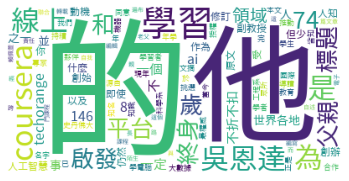

In [ ]:
# 顯示文字雲(不要顯示座標軸)
plt.axis("off")
plt.imshow(wcs[0])

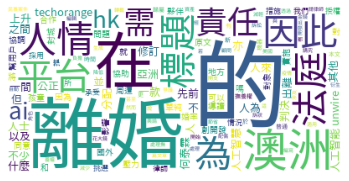

In [ ]:
plt.axis("off")
plt.imshow(wcs[1])

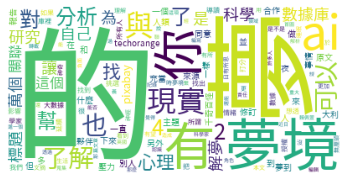

In [ ]:
plt.axis("off")
plt.imshow(wcs[2])

### 課堂練習

In [ ]:
### TODO
# 自行選取『科技橘報』語料庫中任一篇文章 用skitlearn count
# 繪製其前十大詞頻的長條圖或文字雲 (通常default前200)

In [ ]:
import pandas as pd

csv = '/content/gdrive/MyDrive/AI_&_EdgeComputing_Program/NLP/shared_folder/dataset/techorange_ai.csv'
df = pd.read_csv(csv)


print(f'info():\n{df.info()}')

type(df)
#pandas.core.frame.DataFrame

print('\n\ndf: \n:', df.head())
print('\n\ntitle: \n',df['title'].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  792 non-null    int64 
 1   date        792 non-null    object
 2   title       792 non-null    object
 3   link        792 non-null    object
 4   content     790 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.1+ KB
info():
None


df: 
:    Unnamed: 0  ...                                            content
0           0  ...  企業走向數位轉型，勢必將越來越依賴網路和系統，連帶  IT  基礎架構也必須有所轉變，才能滿...
1           1  ...  （本文經合作夥伴中央社授權轉載，並同意 TechOrange 編寫導讀與修訂標題，原文標題為...
2           2  ...   （本文經合作夥伴 大數據文摘 授權轉載，並同意 TechOrange 編寫導讀與修訂標題，...
3           3  ...  （本文經合作夥伴 unwire.hk 授權轉載，並同意 TechOrange 編寫導讀與修訂...
4           4  ...  新冠疫情爆發前，AI 與機器學習就開始滲透各種產業，改變商業模式與生活樣貌；新冠疫情爆發後，...

[5 rows x 5 columns]


title: 
 0          【比綠乖乖更有效！】奔騰網路 AIOps 平台，善用 IT 幫助確保系統關鍵時刻不掉鏈
1            【將拯救千萬性命的 AI 模型！】台大研發 

In [ ]:
titles = df['title'].apply(str).tolist()


print(titles[:3])


contents = df['content'].apply(str).tolist()


print(contents[:2])

selected_docs = [6]

docs = []

['【比綠乖乖更有效！】奔騰網路 AIOps 平台，善用 IT 幫助確保系統關鍵時刻不掉鏈', '【將拯救千萬性命的 AI 模型！】台大研發 AI 揪出早期胰臟癌，準確率逾 9 成', '【八年上了 146 堂線上課！】現年 74 歲仍不停止學習，吳恩達創辦 Coursera 就因為他']
['企業走向數位轉型，勢必將越來越依賴網路和系統，連帶  IT  基礎架構也必須有所轉變，才能滿足數位轉型需求。為了降低  IT  維運管理過程中的人力負擔與人為疏失風險，許多企業會導入「智慧維運平台  AIOps」。AIOps（Artificial Intelligence for IT Operations），是最近幾年市場的熱門話題！當企業為了確保服務不中斷、系統運作穩定，甚至要做到在出現問題前預先排除，就需要另一套能做到綜合管理多重監控工具、數據，並能依據事件規則，自動執行預設流程腳本的  AI  平台，也就是  AIOps。權威調研公司  Gartner  在研究報告中定義：AI  能透過監控工具、資訊科技服務、自動化來強化  IT  維運。以下舉一個維運的狀況案例，說明監控不察的風險在哪。某國際電動車大廠曾遇到伺服器  App  域名憑證過期的問題，後導致系統停擺近  3  小時，接下來更因駕駛無法用  App  打開車門，在網路上引起一片抱怨聲浪。雖然事件最後平安落幕，但若維運人員無法即時定位系統問題，很可能衍伸成更危險的狀況。當  IT  管理者可能得同時使用十幾種監控工具，還要面對上千條人為定義的規則，不只管理不容易，遇到事件時，也很難判斷造成事件的根本原因（Root Cause）。', '（本文經合作夥伴中央社授權轉載，並同意 TechOrange 編寫導讀與修訂標題，原文標題為 〈台大團隊研發 AI 揪早期胰臟癌 準確率逾 9 成 〉。）【為什麼我們挑選這篇文章】由於大多胰臟癌患者發現時已進入末期，因此胰臟癌又有「癌王」的稱號，許多人視其為看不到的健康敵人。許多世界知名的人物，例如三大男高音帕華洛帝、時尚老佛爺卡爾拉格斐，以及蘋果創辦人賈伯斯，皆是受胰臟癌之苦，最終病逝。（責任編輯：鍾佳瑀）胰臟癌因早期無症狀，確診時往往已相當晚期，5 年死亡率超過 9 成，堪稱「癌王」。台大醫院團隊研發全球首個 AI 工具，可找出 1 公分的胰臟腫瘤，準確度超過 9 成，可

In [ ]:
for i in selected_docs:
    docs.append(contents[i])
    print(contents[i])


【我們為什麼挑選這則新聞】臺南市政府推動產業轉型不遺餘力，在市府積極營造友善投資環境的努力下，累積了厚實的產業基礎。面對 5G 時代的競爭樣態與全球數位發展的契機，臺南市政府為企業聚落的轉型與升級提供全方面的資源，將吸引更多新創與人才的投入，為臺南注入更多創新量能。（責任編輯：賴佩萱）新冠肺炎疫情重創許多產業，企業如何化危機為轉機，對接中央 5G 政策及持續推動產業轉型，臺南市政府今（29）日於大員皇冠酒店辦理「109 年前瞻產業發展論壇」，由財訊雙週刊社長謝金河主持，會中邀請黃偉哲市長、經濟部次長林全能、南科管理局副局長蘇振清、國家傳播通訊委員會主任祕書陳崇樹及在地知名產業代表，從「專注細節隱形冠軍在臺南」、「數位轉型改造企業 DNA」及「5G 領先亮眼全世界」三個主題，剖析臺南產業現況及未來發展藍圖。黃偉哲市長致詞時表示，臺南的製造產業聚落已為臺南打下良好的產業基礎，在市府持續不斷的加強投資環境下，接連迎來 Google、台積電、荷商 ASML 等大廠加碼投資臺南，南科三期擴建也在去年拍板定案續留臺南，已讓臺南成為高科技產業鏈的核心要角之一，使得在 COVID-19 疫情衝擊全球經濟下，臺南半導體投資機會有增無減，而此時正是臺南順勢推動產業升級的最佳時機。場中，市長也打趣的說，「嫁的好尪，提早幸福二十冬；娶到好某，一世人謀煩惱（台語）」用以比喻台積電落腳在臺南，猶如上天賜予的禮物，市府將全力把握產業發展及轉型的契機，用最短的時間，發揮南科與臺南共同創造的加乘效益，促成臺南產業的新氣象。黃偉哲又表示，臺南為對接中央 5G 政策推動，市府與廣達集團為首的 11 家業者及法人，於今年 7 月在國發會見證下簽署合作備忘錄，陸續將媒合公私部門的場地，提供業者試驗 5G 傳輸技術的應用，進而打造出能夠外銷全世界的「5G 臺南隊」，希望整合各界資源，掌握「彎道超車」的機會，快速翻轉臺南產業實力，抓住疫後數位發展的全球商機。


In [ ]:
# 分詞再合併
import jieba

tokenized_docs = []
for doc in docs:
    tokens = jieba.lcut(doc) ##請注意doc shape 是1D list ['str1','str2', 'str3'....]
    doc = ' '.join(tokens)  #請注意doc shape 是str 因為wordcloud只吃字串(必為1D) 
    tokenized_docs.append(doc)

In [ ]:
# 計算tf

vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')  
document_term_matrix = vectorizer.fit_transform(tokenized_docs)  #result是matrix

print(f'\n document_term_matrix type: {type(document_term_matrix)}') 
tfs = document_term_matrix.toarray() #將matrix 成to  nd array


print('tfs type: \n', type(tfs))
tokens = vectorizer.get_feature_names()  
#tokens為1D array ex, ['146', '2', '4', '74', '8', 'ai', 'coursera', 'hk', 'pixabay', 'techorange', 'unwire', '一個', '一定', '一樣', '一款



 document_term_matrix type: <class 'scipy.sparse.csr.csr_matrix'>
tfs type: 
 <class 'numpy.ndarray'>


In [ ]:
"""
trash = ['的', '他', '但', '即使']

for i in range(1,len(tfs)+1,1):

  if tfs[i-1] not in trash:
    tfs.pop(i-1)

tfs = tfs.toarray() #轉乘ND array
"""

TypeError: ignored

In [ ]:
print(tokens)
pd.DataFrame(tfs,columns=tokens)

['109', '11', '19', '29', '5g', '7', 'asml', 'covid', 'dna', 'google', '一', '三個', '三期', '上天', '下', '不', '不斷', '世人', '中', '中央', '主任', '主持', '主題', '之一', '也', '了', '二十', '亮眼', '人才', '什麼', '今', '今年', '代表', '企業', '使得', '來', '促成', '偉哲', '偉哲市', '備忘錄', '傳播', '傳輸', '全', '全世界', '全力', '全球', '全能', '公私', '共同', '冠', '冬', '到', '前瞻', '剖析', '副', '創新量', '創造', '加乘', '加強', '加碼', '努力', '化危', '升級', '南', '南半導體', '南成', '南為', '南產業', '南科', '南隊', '南順勢', '厚實', '去年', '又', '及', '及持續', '友善', '台積', '台積電', '台語', '各界', '合作', '吸引', '哲市', '商機', '國家', '國發會', '在', '地', '基礎', '場中', '場地', '增無減', '外銷', '大員', '大廠', '契機', '好', '如何', '娶', '媒合', '嫁', '定案', '家業者', '實力', '將', '專注', '對', '對接', '尪', '局長', '崇樹及', '已', '已為', '市府', '市政府', '市長', '希望', '年', '幸福', '廣達', '彎道', '從', '快速', '應用', '我們', '打下', '打趣', '打造出', '技術', '把握', '抓住', '投入', '投資', '拍板', '持續', '挑選', '掌握', '接', '接連迎', '推動', '推動產業', '提供', '提早', '擴建', '改造', '政策', '效益', '整合', '數位', '新冠', '新創', '新氣象', '新聞', '方面', '於', '日', '時代', '時機', '時間', '更多', '書', '最', '最佳', '會', '月', '有', '未

,109,11,19,29,5g,7,asml,covid,dna,google,一,三個,三期,上天,下,不,不斷,世人,中,中央,主任,主持,主題,之一,也,了,二十,亮眼,人才,什麼,今,今年,代表,企業,使得,來,促成,偉哲,偉哲市,備忘錄,...,請黃偉,論壇,謀煩惱,謝,證下,讓,財訊雙,責任,資源,賜予,賴佩萱,超車,軍,轉型,轉機,辦理,這則,通訊委員會,造,週刊,進而,遺餘力,邀,部次,部門,酒店,重創,金河,鏈,長,陳,陸續將,隱形,集團,電落,面對,領先,首,高科技,黃
0,1,1,1,1,6,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,2


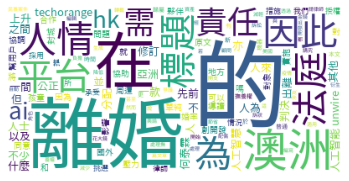

In [ ]:
# 顯示文字雲(不要顯示座標軸)
plt.axis("off")
plt.imshow(wcs[1])